In [1]:
from utils.data import *
from time import time
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Convolution2D, DepthwiseConv2D, AveragePooling2D

Using TensorFlow backend.


In [10]:
n_classes = 60
pho = 1
t1 = time()
data, labels, label_to_breed, breed_to_label = load_data(width = int(pho*224), height = int(pho*224), n_classes = n_classes)
print('Time to load the data: %ss' % int(time()-t1))

./data/dog_images.tar already exists. Begin extracting...
Standford dogs data were extracted. Begin creating dataset...
Dataset, labels and dictionaries are loaded
Time to load the data: 36s


In [11]:
data.shape, labels.shape

((10254, 224, 224, 3), (10254,))

In [12]:
shuffle = np.random.choice(data.shape[0], data.shape[0], replace = False)

In [13]:
x = data[shuffle,:,:,:]
y = labels[shuffle,]
x.shape, y.shape

((10254, 224, 224, 3), (10254,))

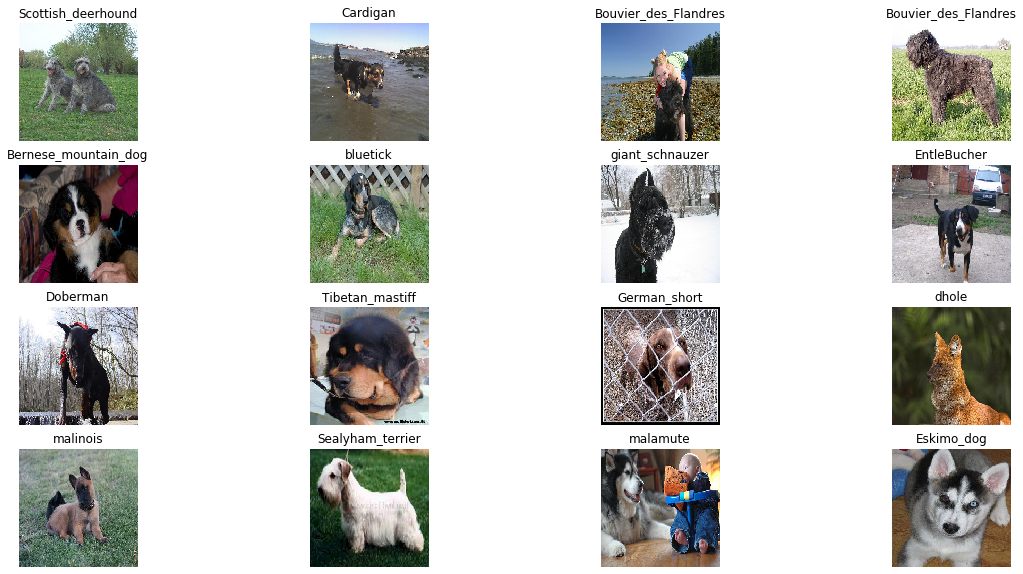

In [14]:
# Visualization of the original data
fig = plt.figure(figsize=(20,10))
for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(x[i,:,:,:])
    ax.axis('off')
    ax.title.set_text(label_to_breed[y[i]])

In [15]:
num_train = int(0.90*x.shape[0])
num_val = int(0.05*x.shape[0])
num_test = x.shape[0]-(num_train+num_val)

x_train = x[:num_train,:,:,:]
y_train = y[:num_train,]
x_val = x[num_train:num_train+num_val,:,:,:]
y_val = y[num_train:num_train+num_val,]
x_test = x[num_train+num_val:,:,:,:]
y_test = y[num_train+num_val:,]

x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(9228, 224, 224, 3) (9228,)
(512, 224, 224, 3) (512,)
(514, 224, 224, 3) (514,)


In [18]:
alpha = 1

model = Sequential()

model.add(Convolution2D(int(alpha*32), (3, 3), strides=2, padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(int(alpha*64), (1, 1), padding='same', strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', strides=(2,2), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(int(alpha*128), (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(int(alpha*128), (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', strides=(2,2), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(int(alpha*256), (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(int(alpha*256), (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', strides=(2,2), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(int(alpha*512), (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(int(alpha*512), (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(int(alpha*512), (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(int(alpha*512), (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(int(alpha*512), (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(int(alpha*512), (1, 1), strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', strides=(2,2), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(int(alpha*1024), (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(int(alpha*1024), (1, 1), padding='same', strides=1, activation='relu'))
model.add(BatchNormalization())

shape = model.output_shape[1]

model.add(AveragePooling2D(pool_size=(shape,shape), strides=1))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(n_classes, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 112, 112, 32)      896       
_________________________________________________________________
batch_normalization_59 (Batc (None, 112, 112, 32)      128       
_________________________________________________________________
depthwise_conv2d_27 (Depthwi (None, 112, 112, 32)      320       
_________________________________________________________________
batch_normalization_60 (Batc (None, 112, 112, 32)      128       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 112, 112, 64)      2112      
_________________________________________________________________
batch_normalization_61 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
depthwise_conv2d_28 (Depthwi (None, 56, 56, 64)       

In [10]:
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# 9. Fit model on training data
history = model.fit(x_train, to_categorical(y_train), validation_data=(x_val, to_categorical(y_val)), 
          batch_size=128, epochs=1, verbose=1)

Train on 9228 samples, validate on 512 samples
Epoch 1/1
4736/9228 [==============>...............] - ETA: 2:15 - loss: 4.7960 - accuracy: 0.0188

In [10]:
# 10. Evaluate model on test data
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/1
19550/19550 [==============================] - 2027s 104ms/step - loss: 4.7486 - accuracy: 0.0182


In [11]:
score

[4.560169435451051, 0.03498542308807373]